<a href="https://colab.research.google.com/github/hsiaom26/DS4CS/blob/master/T04_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# hsiaom at nccu dot edu dot tw
# Prof. Shun-Wen Hsiao
# for Data Science for Cybersecurity Course
# March 2020

# Model

### What is a model?
* data size (n)
* features (X1, X2, ..., Xm)
* target (y)
* predict value ($\hat{y}$)

### What if?
* data size is large or small?
* categorical feature, numerical feature
* categorical target (classification problem)
* numerical target (regression problem)

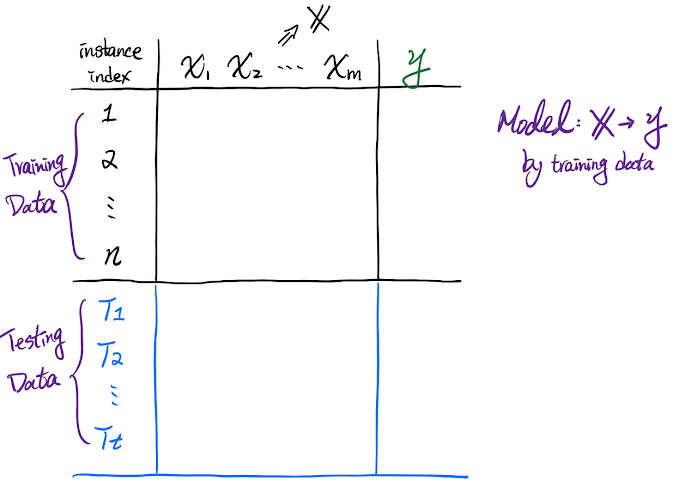

![Table-Based Data Model by Prof. Shun-Wen Hsiao](https://drive.google.com/uc?id=1zRVb0zZsR1CyEY9PrZbSXHdqO3zgR40L)

### Linear Regression

* Is it linear?

![Linear](https://drive.google.com/uc?id=1_7nQpFdUnO44b6lFVgOTozLNA7faBVBE)

* How to find "the best" line (model) to represent these data points?
 * mean-square error, MSE, a.k.a. L2 Loss Function
 * Anything else? What is L1 Loss Function?
 

![MSE](https://drive.google.com/uc?id=128SpK-4AcR_s9qTJmX2zQEZBXZA0F0i2)

In [ ]:
# Linear Regression
import numpy as np
import matplotlib.pyplot as plt

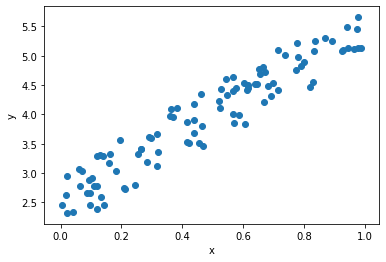

In [ ]:
# Create some simple data
np.random.seed(0)
x = np.random.rand(100)
y = 3 * x + 2 + np.random.rand(100)

# plot
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### MSE (mean-square error)
* MSE = $\frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y_i})^{2}}$

  * $\hat{y_i}$ = Model($x_i$)
  * Model($x$) = $ax+b$ (linear)
  * Model ($X$) = $\theta_0 + \theta_1 X_1 + \theta_2 X_2 + \theta_3 X_3 + ...$ (general form)

* RMSE = $\sqrt{\text{MSE}}$

* L1 = $\frac{1}{n}\sum_{i=1}^{n}{|y_i - \hat{y_i}|}$

* Which one is better?

In [ ]:
# mse, L2
y_ = 100
y_hat = np.linspace(-10000, 10000)

mse = pow(y_hat - y_, 2)

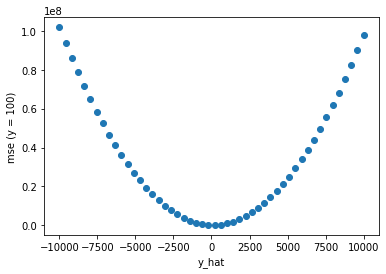

In [ ]:
plt.scatter(y_hat, mse)
plt.xlabel('y_hat')
plt.ylabel('mse (y = '+ str(y_) + ')')
plt.show()

In [ ]:
### L1, or MAE (Mean absolute error)
y_ = 100
y_hat = np.linspace(-10000, 10000)

l1 = abs(y_hat - y_)

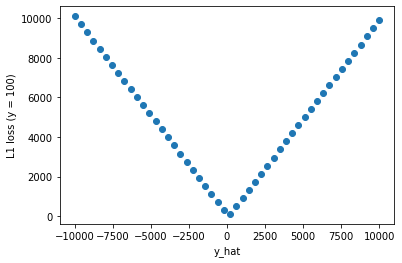

In [ ]:
plt.scatter(y_hat, l1)
plt.xlabel('y_hat')
plt.ylabel('L1 loss (y = 100)')
plt.show()

* Again, why L2 is better than L1?
  * Differentiable
  * Penality

* Find the minimum value of differentiation!
  * MSE = $\frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y_i})^{2}}$
  * Let $\hat{y} = \theta_0 + \theta_1 x_i $ (or $\hat{y} = ax+b$, i.e., linear model)
  * MSE = $\frac{1}{n}\sum_{i=1}^{n}{(y_i - (\theta_0 + \theta_1 x_i))^{2}}$
  * MSE becomes a two variables ($\theta_0$, $\theta_1$) polynomial function of degree 2.
    * i.e., It's a 3D surface with a minmal value. 
    * Try to draw a figure.

### Gradient Descent

In [ ]:
# Draw the 3D surface (a, b, mse)

a_range = np.linspace(0, 5, 12) # try to change the last par to 24
b_range = np.linspace(0, 5, 12) # try to change the last par to 24
A, B = np.meshgrid(a_range, b_range)

min_z = 1000
Z = []
for a in a_range:
  z_value = []
  for b in b_range:
    this_mse = np.sum(np.power(y - (a*x+b), 2))/len(y)
    z_value.append(this_mse)
    if this_mse < min_z:
      min_z = this_mse
      best_a, best_b = a, b
  Z.append(z_value)

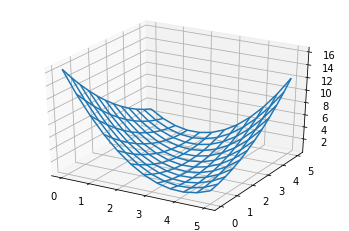

In [ ]:
from mpl_toolkits.mplot3d import axes3d

fig_3d = plt.figure()
ax = fig_3d.add_subplot(111, projection='3d')
ax.plot_wireframe(A, B, np.array(Z))

plt.show()

In [ ]:
# answer from above grid
print(best_a, best_b, min_z)

# answer from math
# we will discuss it later.
print("\nThe actual opt_a*, opt_b*, and minmal z are:")
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(x.reshape(-1, 1), y.reshape(-1, 1))
opt_a = lg.coef_.flatten()[0]
opt_b = lg.intercept_.flatten()[0]
min_mse = np.sum(np.power(y - (opt_a * x + opt_b), 2)/len(y))
# end of answer from math

print(opt_a, opt_b, min_mse)

2.727272727272727 2.727272727272727 0.08480826037930303

The actual opt_a*, opt_b*, and minmal z are:
2.9365510602037683 2.5580800241570216 0.07623324582875009


You shuold not bruce-forcefully try all (a, b), i.e., ($\theta_1, \theta_0$), to find the optimal z (i.e., MSE).

Partial differential is much quicker to find the minima value of each dimension.

Using a randome pair (a, b) <u>at time 0</u> as the inital trial point, and of course, the corresponding z is unlikely the optimal z.

However, you can do partial differential on a-axis and b-axis, respectively.

So that we can know that starting from the current (a,b) <u>at time $t$</u>, which direction on a-axis and b-axis will lead to a smaller z. And <u>at time $t$+1</u>, we can choose a better (a, b) by considering the direction and make one step ($\gamma$, a.k.a. learning rate) toward the optimized z. And so on so forth (may times) to find the optimized z with ($a^*$, $b^*$).

MSE = $\frac{1}{n}\sum_{i=1}^{n}{(y_i - (\theta_0 + \theta_1 x_i))^{2}}$

We view MSE is a function of $\theta_0$ and $\theta_1$, and in the training phase, all x and y are known.

$\theta_{i}^{(t+1)} = \theta_{i}^{(t)} - \gamma \frac{\partial \text{MSE}(\theta_{0},\theta_{1})}{\partial \theta_i}$

Questions:

 
* Sometimes MSE is defined as follows. Why?
  * MSE' = $\frac{1}{2n}\sum_{i=1}^{n}{(y_i - \hat{y_i})^{2}}$
*  Could GD find the minimum z?
*  Is there any other faster way to find the minmum z?

### Additional Materials

* [Linear Regression using Python](https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2)

### Linear or non-linear?

In [ ]:
import pandas as pd

# anscombe.json can be found in the same directory in GDrive.
# You can "Mount Drive" to access the file in your GDrive.

try:
  anscombe_df = pd.read_csv('anscombe.json')
  print("anscombe.csv is loaded.")
except:
  print("Check file?")

Check file?


In [ ]:
# Or anscombe.json can be found in colab's sample_data directory.

try:
  anscombe_df = pd.read_json('/content/sample_data/anscombe.json')
  print("anscombe.json is loaded.")
except:
  print("Check file?")

anscombe.json is loaded.


In [ ]:
anscombe_df

,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33
5,I,14,9.96
6,I,6,7.24
7,I,4,4.26
8,I,12,10.84
9,I,7,4.81


It looks like a liner model is good enough.


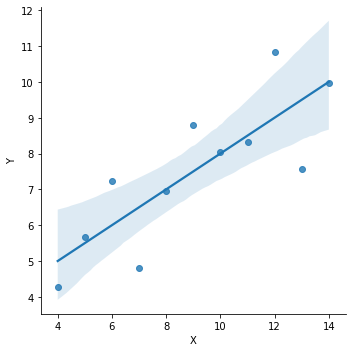

In [ ]:
import seaborn # pip install seaborn

seaborn.lmplot(x='X', y='Y', data=anscombe_df[anscombe_df.Series == 'I'])
print("It looks like a liner model is good enough.")

model looks not that good, we need polynomial regression.


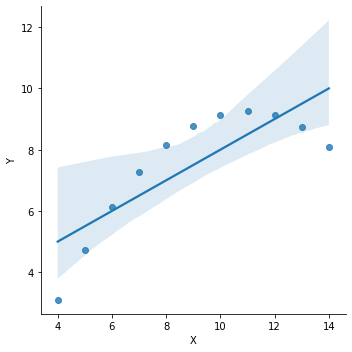

In [ ]:
seaborn.lmplot(x='X', y='Y', data=anscombe_df[anscombe_df.Series == 'II'])
print("model looks not that good, we need polynomial regression.")

much better


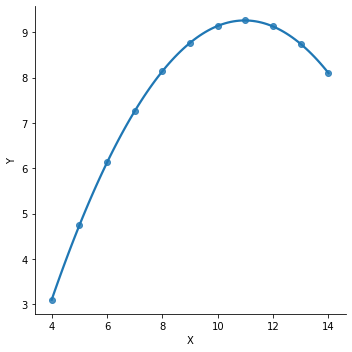

In [ ]:
seaborn.lmplot(x="X", y="Y", data=anscombe_df[anscombe_df.Series == 'II'], order=2)
print("much better")

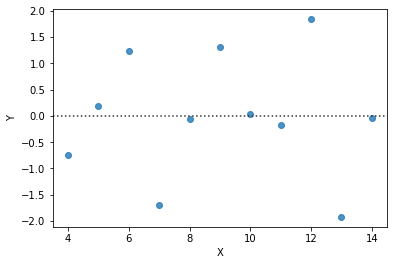

In [ ]:
'''
The residplot() function can be a useful tool
for checking whether the simple regression model is appropriate for a dataset.
It fits and removes a simple linear regression
and then plots the residual values for each observation.
Ideally, these values should be randomly scattered around y = 0.
'''
seaborn.residplot(x="X", y="Y", data=anscombe_df[anscombe_df.Series == 'I'])
# Try different dataset: I, II, and III

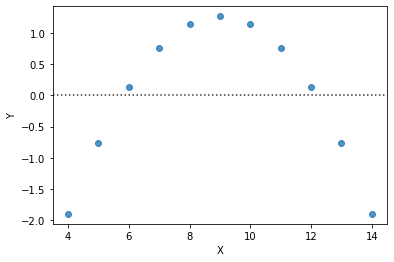

In [ ]:
seaborn.residplot(x="X", y="Y", data=anscombe_df[anscombe_df.Series == 'II'])

Outliers! It is a big problem!


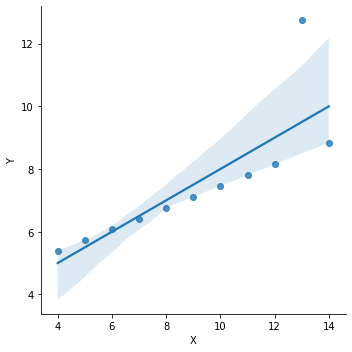

In [ ]:
seaborn.lmplot(x='X', y='Y', data=anscombe_df[anscombe_df.Series == 'III'])
print("Outliers! It is a big problem!" )

However, you should not use some magic functions that you do not know much about them.


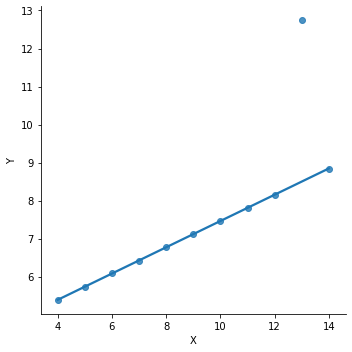

In [ ]:
# In the presence of outliers, it can be useful to fit a robust regression,
# which uses a different loss function to downweight relatively large residuals.

seaborn.lmplot(x="X", y="Y", data=anscombe_df[anscombe_df.Series == 'III'], robust=True, ci=None)
print("However, you should not use some magic functions that you do not know much about them.")

Error! It is another big problem!


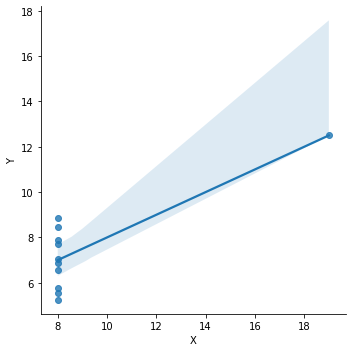

In [ ]:
seaborn.lmplot(x='X', y='Y', data=anscombe_df[anscombe_df.Series == 'IV'])
print("Error! It is another big problem!" )

# Training/Testing Process w/ Liner Regression

### EDA, Exporatory Data Analysis

In [ ]:
housing_train_df = pd.read_csv('/content/sample_data/california_housing_train.csv')
housing_test_df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
housing_train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
housing_test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
# Let "median_house_value" be our target.
# See if we can find a linear model to predict the target value.

# take a look at the data
housing_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB


could you make a comment to all the historgrams?


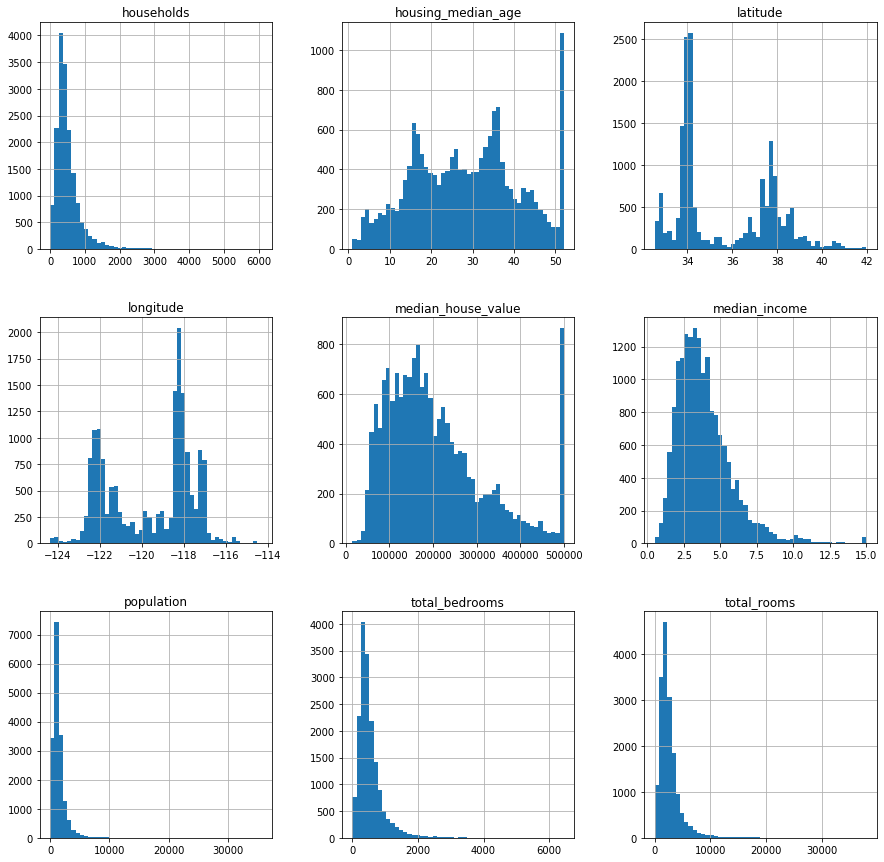

In [ ]:
import matplotlib.pyplot as plt

housing_train_df.hist(bins=50, figsize=(15,15))
print("could you make a comment to all the historgrams?")
plt.show()

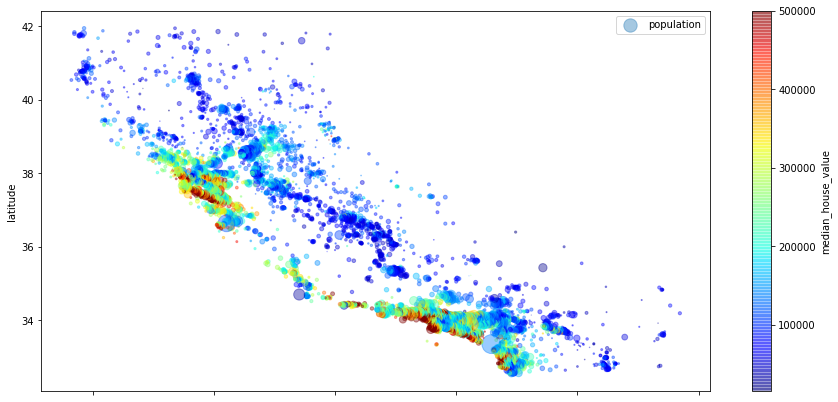

In [ ]:
# https://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html

# s = size; c = color
housing_train_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                      s=housing_train_df["population"]/100, label="population",
                      c="median_house_value", cmap=plt.get_cmap("jet"),
                      colorbar=True, figsize=(15,7))
plt.legend()

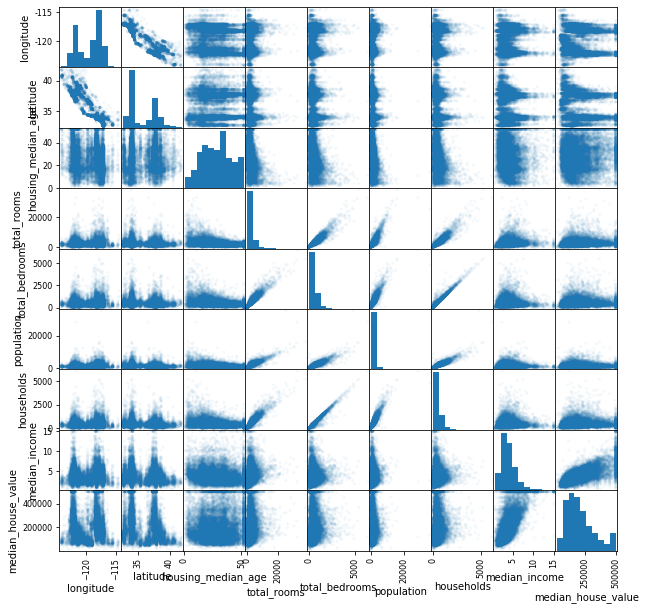

In [ ]:
# The scatterplot matrix is a grid of plots of
# multiple variables against each other.
# It shows the relationship of each variable to the others.
# The ones on the diagonal don't fit this pattern.

attributes = ['median_house_value', 'median_income',
             'total_rooms', 'housing_median_age']
pd.plotting.scatter_matrix(housing_train_df,
                           alpha=0.05, figsize=(10,10), diagonal='hist')
plt.show()

median_income looks promising


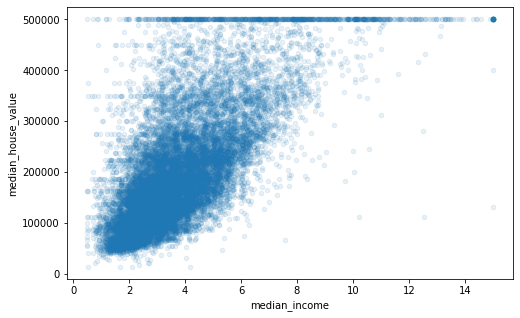

In [ ]:
housing_train_df.plot(kind='scatter', x='median_income', y='median_house_value',
                      alpha=0.1, figsize=(8,5))
print("median_income looks promising")

In [ ]:
corr_matrix = housing_train_df.corr()
corr_matrix.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1,-0.925208,-0.11425,0.0470104,0.071802,0.101674,0.0596277,-0.015485,-0.0449817
latitude,-0.925208,1,0.0164539,-0.0387726,-0.0693729,-0.111261,-0.0749023,-0.080303,-0.144917
housing_median_age,-0.11425,0.0164539,1,-0.360984,-0.320434,-0.29589,-0.302754,-0.115932,0.106758
total_rooms,0.0470104,-0.0387726,-0.360984,1,0.928403,0.86017,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.0693729,-0.320434,0.928403,1,0.881169,0.98092,-0.0134947,0.0457831
population,0.101674,-0.111261,-0.29589,0.86017,0.881169,1,0.909247,-0.000637629,-0.0278501
households,0.0596277,-0.0749023,-0.302754,0.919018,0.98092,0.909247,1,0.00764372,0.0610306
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.0134947,-0.000637629,0.00764372,1,0.691871
median_house_value,-0.0449817,-0.144917,0.106758,0.130991,0.0457831,-0.0278501,0.0610306,0.691871,1


In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691871
total_rooms           0.130991
housing_median_age    0.106758
households            0.061031
total_bedrooms        0.045783
population           -0.027850
longitude            -0.044982
latitude             -0.144917
Name: median_house_value, dtype: float64

### Using sklearn

In [ ]:
# Again, see the first figure. We need prepare four data blocks
# for learning the model parameters.

# Ususlly, we do not implelemt algorithms on our own.
# There exists well-implemented libraries.
# However, again, you should read API documents before using them.

In [ ]:
X_train = housing_train_df.drop(['median_house_value'], axis=1)
y_train = housing_train_df['median_house_value']

X_test = housing_test_df.drop(['median_house_value'], axis=1)
y_test = housing_test_df['median_house_value']

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

#initantiate the linear regression
linearRegModel = LinearRegression()

#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the intercept and coefficients 
print("Intercept is ", linearRegModel.intercept_)
print("coefficients  is ", linearRegModel.coef_)


# print with feature name
print()
print("median_house_value = ")
for c,f in zip(linearRegModel.coef_, X_train.columns):
  print(' {0:+} * {1}'.format(c, f))
print("", linearRegModel.intercept_)

Intercept is  -3620600.8929739078
coefficients  is  [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04]

median_house_value = 
 -43139.63725758569 * longitude
 -42925.67308831368 * latitude
 +1150.6949324745615 * housing_median_age
 -8.378251213198382 * total_rooms
 +117.64854284209014 * total_bedrooms
 -38.48877209597413 * population
 +45.43600255225738 * households
 +40507.06835939748 * median_income
 -3620600.8929739078


Is it reasonable that the above formula makes sense?

Why do we believe the realwold data is related
and can be modeled?

Do you believe this world is liner?

In [ ]:
# using the coefficients find by the training data
# to predict the target values of the testing data
y_pred = linearRegModel.predict(X_test)

In [ ]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_train,linearRegModel.predict(X_train))))

69765.36022216761
69458.7875932693


In [ ]:
# should be same as above, RMSE.
RMSE = pow(np.power(y_test - y_pred, 2).sum()/len(y_test), 0.5)
print(RMSE)

69765.36022216761


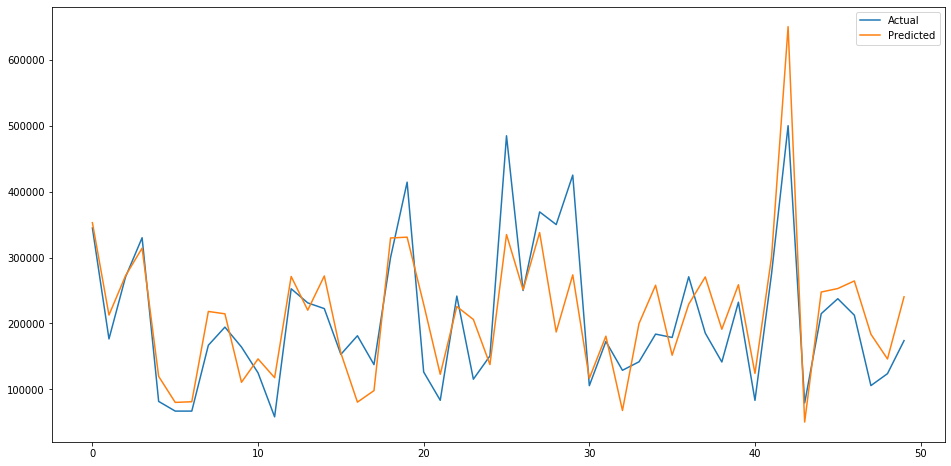

In [ ]:
# compare actual and predicted value of the last 50 data points in test dataset 
num = 50
fig = plt.figure(figsize=(16,8))
plt.plot(range(num), y_test[:num])
plt.plot(range(num), y_pred[:num])
plt.legend(['Actual','Predicted'])
plt.show()

In [ ]:
# Now, your task is to lower the RMSE value!
print("RMSE:", RMSE)

RMSE: 69765.36022216761


# Feature Engineering

### Feature Normalization
Why do we need normalization? Hint: gradient decent.

* Min-Max Scaling: $X_{norm} = \frac{X-X_{min}}{X_{max}-X_{min}}$

* Z-score Normalization: $z = \frac{x-\mu}{\sigma}$
  * $\mu$ is the mean of original data points; $\sigma$ is the std.
  * z: Mapping data points to a distributsion whose mean is 1 and std is 0.

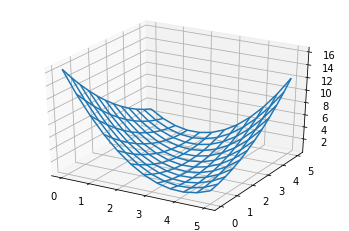

In [ ]:
fig_3d

To find the opimized z*, the SGD works as follows.

MSE = $\frac{1}{n}\sum_{i=1}^{n}{(y_i - (\theta_0 + \theta_1 x_i))^{2}}$

$\theta_{i}^{(t+1)} = \theta_{i}^{(t)} - \gamma \frac{\partial \text{MSE}(\theta)}{\partial \theta_i}$

Look! For each step ($\gamma$), due to the value calculated different axis of partial differential (i.e., $\frac{\partial \text{MSE}(\theta)}{\partial \theta_i}$) are different, the length of stride on each axis is different.

In this case, the "speed" of finding minimum point in each dimension is different. So that we apply Min-Max Scaling or Z-score Normalization to each dimension.

In [ ]:
# What if a MSE surface looks like this?
def fun(x, y):
    return x**2 + y

x = y = np.arange(-3.0, 3.0, 0.3)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

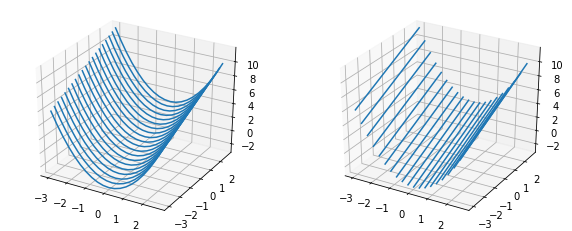

In [ ]:
fig_3d_a = plt.figure(figsize=(10,4))
ax_l = fig_3d_a.add_subplot(121, projection='3d')
ax_r = fig_3d_a.add_subplot(122, projection='3d')

ax_l.plot_wireframe(X, Y, Z, rstride=1, cstride=0)
ax_r.plot_wireframe(X, Y, Z, rstride=0, cstride=1)

plt.show()

In [ ]:
# From the above figures, we can quickly find opt_b*,
# since the slop is larger. We need more steps to find opt_a*. 

# Try to normalize x and y, before perform liner regression.
# However, in linear regression, it only affects the time of finding opt_z.
# The value of opt_z should be the same.

# However, in other non-linear model, it may affect.


https://www.sciencemag.org/news/2018/05/ai-researchers-allege-machine-learning-alchemy

Gradient descent relies on trial and error to optimize an algorithm, aiming for minima in a 3D landscape.

ALEXANDER AMINI, DANIELA RUS. MASSACHUSETTS INSTITUTE OF TECHNOLOGY, ADAPTED BY M. ATAROD/SCIENCE

![Gradient descent relies on trial and error to optimize an algorithm, aiming for minima in a 3D landscape.](https://www.sciencemag.org/sites/default/files/styles/article_main_image_-_1280w__no_aspect_/public/ma_0504_NID_alchemy_WEB.jpg?itok=46idHa0e)




### Data Manipulation

Some useful DataFrame operations can be found here.
If you are not familiar with DataFrame, please read it.

https://github.com/hsiaom26/DSFTA/blob/master/pandas.ipynb

#### pandas.Series

In [ ]:
# From Python built-in dictionary to (labled) Series
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
ser3 = pd.Series(sdata)
print(ser3)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64


In [ ]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
ser4 = pd.Series(sdata, index = states)
print(ser4)

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64


In [ ]:
pd.isnull(ser4) # or ser4.isnull() and try ser4.notnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [ ]:
# Name, you can name (the data of) a Series and name its index
ser4.name = "population"
ser4.index.name = "states"
print(ser4)

states
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64


#### pandas.DataFrame

In [ ]:
# DataFrame
"""
A DataFrame represents a tabular, spreadsheet-like data structure
containing an ordered collection of columns.
The DataFrame has both a row and column index;
it can be thought of as a dict of Series.

Row-oriented and column-oriented operations in DataFrame
are treated roughly symmetrically.
Under the hood, the data is stored as one or more two-dimensional blocks
rather than a list, dict.
"""

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data)
print(type(df))
print(df)

<class 'pandas.core.frame.DataFrame'>
    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9


In [ ]:
df2 = pd.DataFrame(data,
                   columns=['year', 'state', 'pop', 'debt'],
                   index=['one', 'two', 'three', 'four', 'five'])
df2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [ ]:
print(df2.year) # or df2['year']
print(df2['state']) # or df2.state

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64
one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object


In [ ]:
df2.loc['two']

year     2001
state    Ohio
pop       1.7
debt      NaN
Name: two, dtype: object

In [ ]:
ser = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
df2['debt'] = ser
df2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [ ]:
# dictionary-like
# It is very useful to creare new features
df2['eastern'] = (df2.state == 'Ohio')
df2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


In [ ]:
df3 = df2.T
df3

,one,two,three,four,five
year,2000,2001,2002,2001,2002
state,Ohio,Ohio,Ohio,Nevada,Nevada
pop,1.5,1.7,3.6,2.4,2.9
debt,NaN,-1.2,NaN,-1.5,-1.7
eastern,True,True,True,False,False


In [ ]:
# indexing
df2[:2]

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True


In [ ]:
df2[df2['pop'] > 2.0]

,year,state,pop,debt,eastern
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


In [ ]:
frame = pd.DataFrame(np.random.randn(4, 3),
                     index = ['Utah', 'Ohio', 'Texas', 'Oregon'],
                     columns = list('abd'))
frame

,a,b,d
Utah,1.126636,-1.079932,-1.147469
Ohio,-0.437820,-0.498032,1.929532
Texas,0.949421,0.087551,-1.225436
Oregon,0.844363,-1.000215,-1.544771


In [ ]:
f1 = lambda x: x.max() - x.min() # x should be a list-like data
f2 = lambda x: x.mean()
f3 = lambda x: x.std()

In [ ]:
s1 = frame.apply(f1, axis = 0)
s2 = frame.apply(f1, axis = 0)
s3 = frame.apply(f1, axis = 0)
print(s1, s2, s3)

a    1.564456
b    1.167483
d    3.474303
dtype: float64 a    1.564456
b    1.167483
d    3.474303
dtype: float64 a    1.564456
b    1.167483
d    3.474303
dtype: float64


In [ ]:
# API document is right here. Uncomment the following code.
# help(pd.DataFrame.apply)
# help(pd.DataFrame.applymap)

Hint: now you should know how to implement Min-Max Scaling and Z-score Normalization.


#### Missing Data

In [ ]:
df = pd.DataFrame(np.random.randn(7,3))
df

,0,1,2
0,1.188030,0.316943,0.920859
1,0.318728,0.856831,-0.651026
2,-1.034243,0.681595,-0.803410
3,-0.689550,-0.455533,0.017479
4,-0.353994,-1.374951,-0.643618
5,-2.223403,0.625231,-1.602058
6,-1.104383,0.052165,-0.739563


In [ ]:
# remove some negative data
df = df.apply(lambda s: [i if i > 0 else np.NaN for i in s])

In [ ]:
df.dropna()
# Do not be afraid of dropping data points with N/A.
# You may even remove cols that have too many N/A.

,0,1,2
0,1.18803,0.316943,0.920859


In [ ]:
df.fillna({0: -0.5, 1: -1}) # try fillna(0, inplace=True)

,0,1,2
0,1.188030,0.316943,0.920859
1,0.318728,0.856831,NaN
2,-0.500000,0.681595,NaN
3,-0.500000,-1.000000,0.017479
4,-0.500000,-1.000000,NaN
5,-0.500000,0.625231,NaN
6,-0.500000,0.052165,NaN


In [ ]:
df.fillna(method='ffill') # method : {'backfill', 'bfill', 'pad', 'ffill', None}

,0,1,2
0,1.188030,0.316943,0.920859
1,0.318728,0.856831,0.920859
2,0.318728,0.681595,0.920859
3,0.318728,0.681595,0.017479
4,0.318728,0.681595,0.017479
5,0.318728,0.625231,0.017479
6,0.318728,0.052165,0.017479


In [ ]:
print(df.mean())
df.fillna(df.mean())
# It is one of the most commonly method to imput missing value.

0    0.753379
1    0.506553
2    0.469169
dtype: float64


,0,1,2
0,1.188030,0.316943,0.920859
1,0.318728,0.856831,0.469169
2,0.753379,0.681595,0.469169
3,0.753379,0.506553,0.017479
4,0.753379,0.506553,0.469169
5,0.753379,0.625231,0.469169
6,0.753379,0.052165,0.469169


What else value can you use for missing value imputation?

### Feature Combination

#### New features

Human sometimes is smarter than algorithm.

In [ ]:
new_feature_room_per_hh = housing_train_df['total_rooms'] / housing_train_df['households']
new_feature_room_per_hh

0        11.889831
1        16.522678
2         6.153846
3         6.641593
4         5.549618
           ...    
16995     6.008130
16996     5.051613
16997     5.870614
16998     5.589958
16999     6.740741
Length: 17000, dtype: float64

In [ ]:
m = new_feature_room_per_hh.mean()
s = new_feature_room_per_hh.std()
print("mean:", m, "std:", s)

mean: 5.439043958500897 std: 2.5391955339639516


#### Outlier

New 2021: https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

In [ ]:
# Simple outlier remover #1
# Remove data > mean + 3*std
# Remove data < mean - 3*std
num_of_std = 3
new_feature_room_per_hh[(m-num_of_std*s < new_feature_room_per_hh) & (new_feature_room_per_hh < m+num_of_std*s)]

0        11.889831
2         6.153846
3         6.641593
4         5.549618
5         5.803347
           ...    
16995     6.008130
16996     5.051613
16997     5.870614
16998     5.589958
16999     6.740741
Length: 16890, dtype: float64

In [ ]:
# who are they?
new_feature_room_per_hh[(new_feature_room_per_hh < m-num_of_std*s) | ( m+num_of_std*s < new_feature_room_per_hh)]

1        16.522678
172      24.625828
186      13.885901
193      19.656250
206      14.706731
           ...    
12876    28.600000
16577    13.440678
16733    21.631579
16770    15.015152
16854    16.541284
Length: 110, dtype: float64

In [ ]:
# Simple outlier remover #2
# IQR = Q3-Q1
# lowerBound = Q1-1.5*IQR
# upperBound = Q3+1.5*IQR
# Try yourself.

Question: how can outliers affect RMSE?

In [ ]:
housing_train_new_df = X_train.copy()
housing_train_new_df['room_per_hh'] = X_train['total_rooms'] / X_train['households']

housing_test_new_df = X_test.copy()
housing_test_new_df['room_per_hh'] = X_test['total_rooms'] / X_test['households']

lg_model_new = LinearRegression()
lg_model_new.fit(housing_train_new_df, y_train)
y_pred_new = lg_model_new.predict(housing_test_new_df)

RMSE_new = np.sqrt(metrics.mean_squared_error(y_test, y_pred_new))

print(RMSE, RMSE_new)

69765.36022216761 69720.65466651291


The new RMSE is a little bit lower when we create new features.

* Can you do more?
* How to use "%" to represent RMSE?